In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv("/Users/shashikanthbokka/Desktop/2-YEAR/minor project/labeled_data.csv")

In [3]:
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
data.tail()

,index,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [5]:
data.shape

(24783, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
data.columns

Index(['index', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [8]:
data.isnull().sum()

index                 0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,index,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [11]:
data.nunique()

index                 24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64

In [12]:
data["labels"]=data['class'].map({0:"Hate speech",1:"Offensive language",2:"No hate and Offense"})
print(data["labels"])

0        No hate and Offense
1         Offensive language
2         Offensive language
3         Offensive language
4         Offensive language
                ...         
24778     Offensive language
24779    No hate and Offense
24780     Offensive language
24781     Offensive language
24782    No hate and Offense
Name: labels, Length: 24783, dtype: object


In [13]:
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and Offense
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language


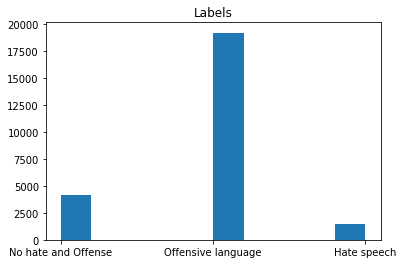

In [14]:
plt.hist(data["labels"],bins=10)
plt.title("Labels")
plt.show()

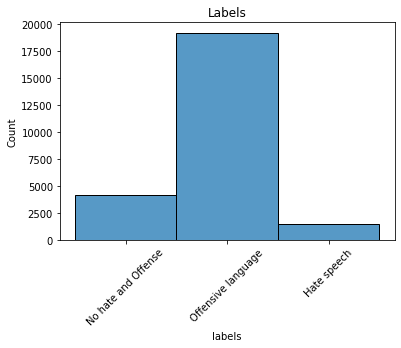

In [15]:
sns.histplot(data["labels"],bins=10)
plt.xticks(rotation=45)

plt.title("Labels")
plt.show()

In [16]:
data['hate_speech'].unique()

array([0, 1, 2, 3, 4, 6, 5, 7])

In [17]:
data['hate_speech'].value_counts()

0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech, dtype: int64

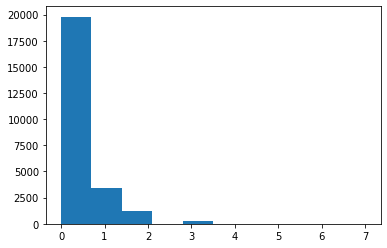

In [18]:
plt.hist(data['hate_speech'],bins=10)
plt.show()

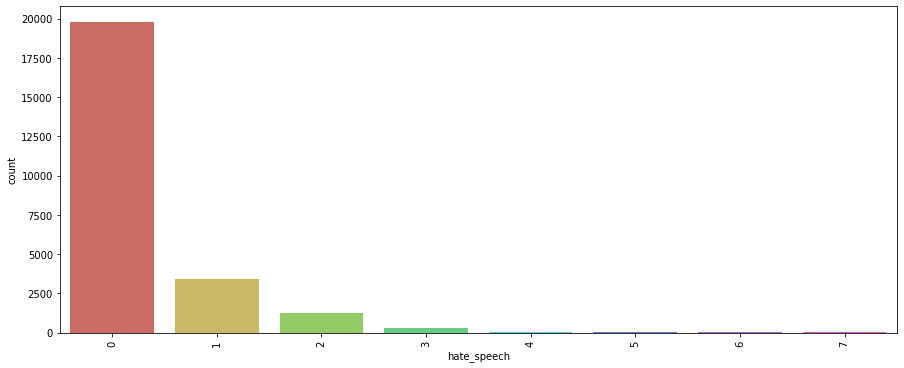

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data['hate_speech'],data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

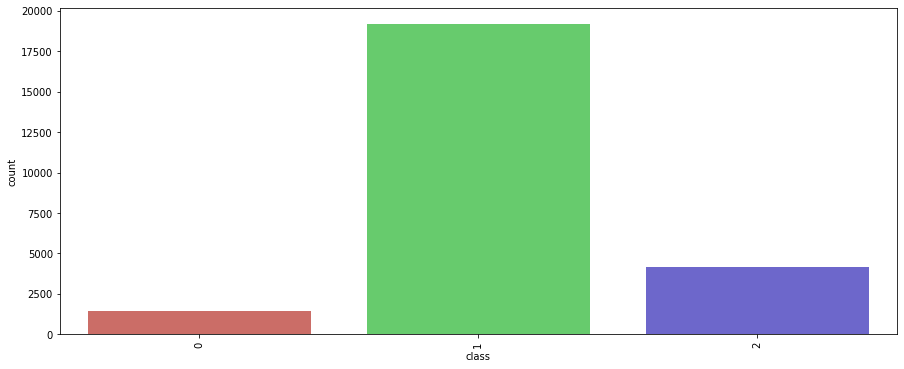

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(data['class'],data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

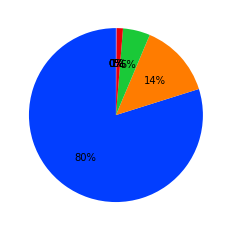

In [21]:
colors=sns.color_palette('bright')
plt.pie(data['hate_speech'].value_counts(),colors=colors,autopct='%0.0f%%',startangle=90)
plt.show()

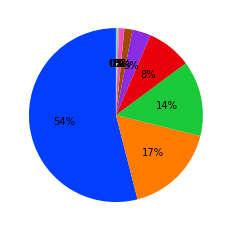

In [22]:
colors=sns.color_palette('bright')
plt.pie(data['offensive_language'].value_counts(),colors=colors,autopct='%0.0f%%',startangle=90)
plt.show()

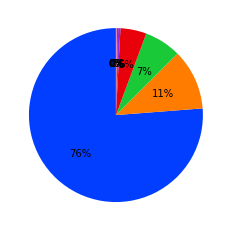

In [23]:
colors=sns.color_palette('bright')
plt.pie(data['neither'].value_counts(),colors=colors,autopct='%0.0f%%',startangle=90)
plt.show()

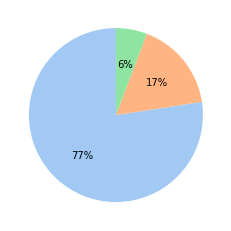

In [24]:
colors=sns.color_palette('pastel')
explode=[0.3,0.2,0.1]
plt.pie(data['labels'].value_counts(),colors=colors,autopct='%0.0f%%',startangle=90)
plt.show()

In [25]:
data['total_lenght_characters']=data['tweet'].str.len()
print(data['total_lenght_characters'])
total_lenght_characters=data['total_lenght_characters'].sum()
print(total_lenght_characters)
count=0
for y in data['tweet']:
    count+=1
print(count)
average_lenght=total_lenght_characters/count
print(average_lenght)

0        140
1         85
2        120
3         62
4        137
        ... 
24778    146
24779     70
24780     67
24781     37
24782    127
Name: total_lenght_characters, Length: 24783, dtype: int64
2117334
24783
85.43493523786466


In [26]:
data['total_count_words']=data['tweet'].str.split().str.len()
print(data['total_count_words'])
total_words=data['total_count_words'].sum()
print(total_words)
count=0
for z in data['tweet']:
    count+=1
print(count)
average_words=total_words/count
print(average_words)

0        25
1        16
2        21
3         9
4        26
         ..
24778    19
24779    13
24780    13
24781     7
24782    18
Name: total_count_words, Length: 24783, dtype: int64
349857
24783
14.116813945042972


In [27]:
import string
import re
import nltk
import pandas as pd
import numpy as np
import nltk.util as pr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
stemmer =nltk.SnowballStemmer("english")
nltk.download("stopwords")
stopword=set(stopwords.words('english'))
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [28]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\}]','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['tweet']=data['tweet'].apply(clean)
print(data['tweet'])

0         rt mayasolov woman shouldnt complain clean ho...
1         rt  boy dat coldtyga dwn bad cuffin dat hoe  ...
2         rt urkindofbrand dawg rt  ever fuck bitch sta...
3                   rt cganderson vivabas look like tranni
4         rt shenikarobert shit hear might true might f...
                               ...                        
24778    yous muthafin lie   coreyemanuel right tl tras...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl  ntac eileen dahlia  beauti color combin...
Name: tweet, Length: 24783, dtype: object


In [29]:
data['total_lenght_characters']=data['tweet'].str.len()
print(data['total_lenght_characters'])
total_lenght_characters=data['total_lenght_characters'].sum()
print(total_lenght_characters)
count=0
for y in data['tweet']:
    count+=1
print(count)
average_lenght=total_lenght_characters/count
print(average_lenght)

0        73
1        51
2        64
3        39
4        65
         ..
24778    68
24779    52
24780    52
24781    30
24782    80
Name: total_lenght_characters, Length: 24783, dtype: int64
1212303
24783
48.91671710446677


In [30]:
x=np.array(data['tweet'])
y=np.array(data['labels'])

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(x)
vectorizer.get_feature_names_out()
print(x.shape)

(24783, 25693)


In [32]:
# .T is for the transpose

first_vector=x[0]
df=pd.DataFrame(first_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['tfidf'])
df.sort_values(by=['tfidf'],ascending=False)

,tfidf
mayasolov,0.477508
shouldnt,0.351964
complain,0.333887
clean,0.329161
woman,0.297411
...,...
goe,0.000000
godzilla,0.000000
godthat,0.000000
godsmackmus,0.000000


In [33]:
from sklearn.cluster import KMeans

In [34]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
print(wcss)

[24511.487522484655, 24371.370197969572, 24265.4796809728, 24177.280464257998, 24113.21598756811, 24066.80750216935, 24003.56788189512, 23954.147507186506, 23942.90845582133, 23897.892619104736]


In [35]:
print(km.cluster_centers_)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.10689328e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.47909570e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.04730992e-04
  0.00000000e+00 0.00000000e+00]
 [7.18755644e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.18648837e-05 0.00000000e+00]]


In [36]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.33,random_state=42)

In [37]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred =clf.predict(x_test)

In [39]:
print("Training accuracy :",clf.score(x_train,y_train))
print("Testing accuracy :",clf.score(x_test,y_test))

Training accuracy : 0.9996386412912551
Testing accuracy : 0.8722337694094633


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 101   44  320]
 [  32 1128  219]
 [ 198  232 5905]]


In [42]:
text1="hello,myself nirmal !!! your machine learning mentor"
data=vectorizer.transform([text1]).toarray()
print(clf.predict(data))

['No hate and Offense']


In [43]:
text1="hello,myself nirmal !!! your machine learning bitch"
data=vectorizer.transform([text1]).toarray()
print(clf.predict(data))

['Offensive language']


In [44]:
text1="it's never to late to tag a bitch"
data=vectorizer.transform([text1]).toarray()
print(clf.predict(data))

['Offensive language']


In [45]:
print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

        Hate speech       0.31      0.22      0.25       465
No hate and Offense       0.80      0.82      0.81      1379
 Offensive language       0.92      0.93      0.92      6335

           accuracy                           0.87      8179
          macro avg       0.67      0.66      0.66      8179
       weighted avg       0.86      0.87      0.87      8179

